Import packages and data

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('../samples/train.csv')

Create training and dev sets

In [85]:
data = np.array(data)
# n is the number of images, p is the number of features + 1
n, p = data.shape
np.random.shuffle(data)
# will have to figure out how Rust version will obtain the same sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:p]
X_dev = X_dev / 255.

data_train = data[1000:n].T
Y_train = data_train[0]
X_train = data_train[1:p]
X_train = X_train / 255.
_,m_train = X_train.shape

Helper functions

In [86]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    # hidden layer
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    # output layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    n = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / n * dZ2.dot(A1.T)
    db2 = 1 / n * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)

    dW1 = 1 / n * dZ1.dot(X.T)
    db1 = 1 / n * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

Important functions

In [91]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
        
    return W1, b1, W2, b2

Train the model!

In [93]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[3 5 1 ... 1 5 1] [4 3 2 ... 8 2 1]
Accuracy:  0.13834146341463416
Iteration:  10
[3 3 1 ... 1 0 1] [4 3 2 ... 8 2 1]
Accuracy:  0.23243902439024391
Iteration:  20
[3 3 1 ... 1 0 1] [4 3 2 ... 8 2 1]
Accuracy:  0.3168048780487805
Iteration:  30
[4 0 2 ... 1 0 1] [4 3 2 ... 8 2 1]
Accuracy:  0.38934146341463416
Iteration:  40
[4 0 2 ... 1 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.4491707317073171
Iteration:  50
[4 0 2 ... 1 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.4958048780487805
Iteration:  60
[4 0 2 ... 1 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.5331463414634147
Iteration:  70
[4 3 2 ... 1 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.5660731707317073
Iteration:  80
[4 3 2 ... 1 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.597390243902439
Iteration:  90
[4 3 2 ... 1 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.6288292682926829
Iteration:  100
[4 3 2 ... 8 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.6552926829268293
Iteration:  110
[4 3 2 ... 8 2 1] [4 3 2 ... 8 2 1]
Accuracy:  0.6772439024390244
Iteration:  120
[4 3 2 ..

Define functions for predictions

In [94]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Make some predictions

Prediction:  [4]
Label:  4


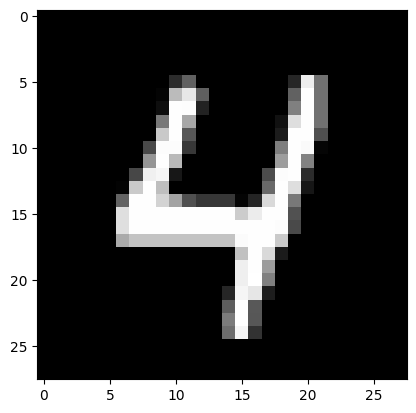

Prediction:  [3]
Label:  3


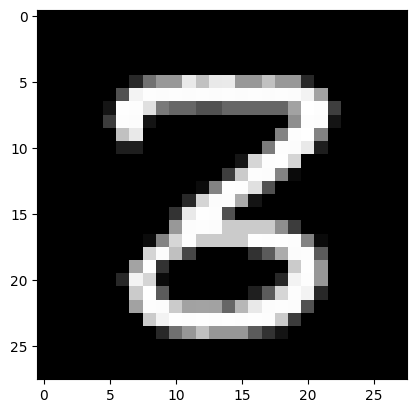

Prediction:  [2]
Label:  2


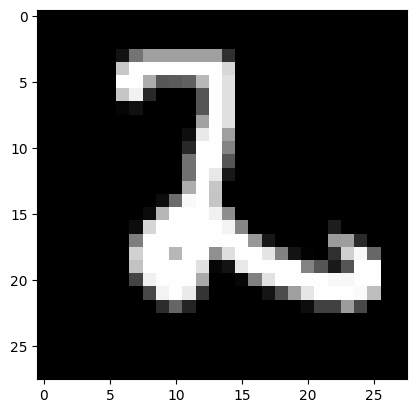

Prediction:  [9]
Label:  9


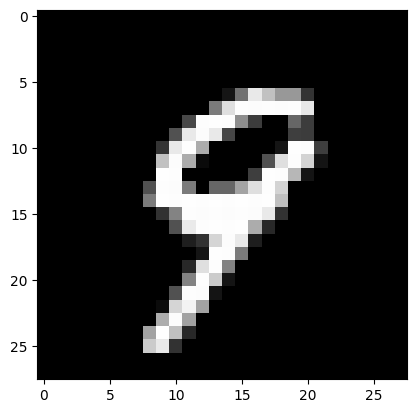

In [95]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)